In [4]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib as mpl
# from matplotlib import rcParams
# rcParams['font.family'] = 'Malgun Gothic'
plt.rc('font', family='Malgun Gothic')
#plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import scipy

from datetime import datetime

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [5]:
df = pd.read_csv("../DABA/네이버_야놀자_병합1.csv", encoding='euc-kr')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   사업장명                    1042 non-null   object 
 1   업소유형                    395 non-null    object 
 2   업태구분명                   1042 non-null   object 
 3   지번주소                    1034 non-null   object 
 4   도로명주소                   1042 non-null   object 
 5   가까운 지하철역                1042 non-null   object 
 6   지하철역과의 거리               1042 non-null   float64
 7   도보시간                    1042 non-null   float64
 8   위도                      1042 non-null   float64
 9   경도                      1042 non-null   float64
 10  별점                      218 non-null    float64
 11  방문자 리뷰수                 374 non-null    float64
 12  블로그 리뷰수                 320 non-null    float64
 13  한실수                     731 non-null    float64
 14  양실수                     754 non-null    

In [ ]:
df.head(3)

In [9]:
# 필요컬럼 추출
select_column = ['사업장명', '지번주소', '도로명주소', '가까운 지하철역', "지하철역과의 거리",
                '도보시간', '위도', '경도', '별점', '구비시설', '네이버 이런점이 좋아요 총합', '네이버 이런점이 좋아요 {항목:좋아요수}',
                '리뷰수', '객실수', '구비시설 개수', '운영기간', '종류', '평점', '숙박가격', '인기테그', '별점 높은순 후기', '별점 낮은순 후기',
                '총후기', '경쟁업소_수(1km내)', '경쟁업소_최단거리(1km내)', '경쟁업소_최장거리(1km내)',  '경쟁업소_평균거리(1km내)',
                '버스정류장_수(1km내)', '지하철역_수(1km내)', '버스정류장_최단거리(1km내)', '버스정류장_평균거리(1km내)', '지하철역_최단거리(1km내)',
                '지하철역_평균거리(1km내)', '교통유동인구_월평균승차수(1km내)', '교통유동인구_월평균하차수(1km내)', '교통유동인구_월평균승하차총계(1km내)',
                '관광지_수(1km내)', '쇼핑몰_수(1km내)', '관광지_최단거리(1km내)', '관광지_평균거리(1km내)', '쇼핑몰_최단거리(1km내)', '쇼핑몰_평균거리(1km내)']
sel_df = df[select_column]

In [10]:
sel_df.head(3)

,사업장명,지번주소,도로명주소,가까운 지하철역,지하철역과의 거리,도보시간,위도,경도,별점,구비시설,...,지하철역_평균거리(1km내),교통유동인구_월평균승차수(1km내),교통유동인구_월평균하차수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내),관광지_최단거리(1km내),관광지_평균거리(1km내),쇼핑몰_최단거리(1km내),쇼핑몰_평균거리(1km내)
0,오요5(oYo5),서울특별시 중구 남산동2가 35-2,"서울특별시 중구 퇴계로18길 43, 지층, 1~2층 (남산동2가)","명동, 4호선",263.21576,3.946264,37.558933,126.98484,NaN,NaN,...,0.80,98463.33,97987.79,196451.12,13,11,0.25,0.68,0.23,0.51
1,더스테이클래식호텔,서울특별시 중구 남대문로3가 94,서울특별시 중구 남대문로 27 (남대문로3가),"회현(남대문시장), 4호선",330.15198,4.949805,37.561480,126.97852,NaN,"['와이파이', '주차장', '컨시어지', '물품보관소']",...,0.50,74675.65,75509.80,150185.45,13,14,0.18,0.66,0.23,0.46
2,베스테이린,서울특별시 관악구 봉천동 866-4,서울특별시 관악구 남부순환로220길 34 (봉천동),"서울대입구(관악구청), 2호선",201.82631,3.025882,37.479755,126.95143,NaN,NaN,...,0.55,49200.56,48453.84,97654.41,9,4,0.15,0.69,0.15,0.52


In [11]:
# .. 연속변수 선택
select_continuos = ['별점', '평점', "지하철역과의 거리", '도보시간', '위도', '경도', '네이버 이런점이 좋아요 총합', '리뷰수', '객실수', '구비시설 개수', '운영기간',
 '숙박가격', '총후기', '경쟁업소_수(1km내)', '경쟁업소_최단거리(1km내)', '경쟁업소_최장거리(1km내)',  '경쟁업소_평균거리(1km내)',
'버스정류장_수(1km내)', '지하철역_수(1km내)', '버스정류장_최단거리(1km내)', '버스정류장_평균거리(1km내)', '지하철역_최단거리(1km내)',
'지하철역_평균거리(1km내)', '교통유동인구_월평균승차수(1km내)', '교통유동인구_월평균하차수(1km내)', '교통유동인구_월평균승하차총계(1km내)',
'관광지_수(1km내)', '쇼핑몰_수(1km내)', '관광지_최단거리(1km내)', '관광지_평균거리(1km내)', '쇼핑몰_최단거리(1km내)', '쇼핑몰_평균거리(1km내)']
#select_continuos = ['별점','지하철역과의 거리','도보시간','리뷰수','객실수','구비시설 개수','네이버 이런점이 좋아요 총합','운영기간'] # 8개
continuous_var = sel_df[select_continuos]
continuous_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   별점                     218 non-null    float64
 1   평점                     1042 non-null   float64
 2   지하철역과의 거리              1042 non-null   float64
 3   도보시간                   1042 non-null   float64
 4   위도                     1042 non-null   float64
 5   경도                     1042 non-null   float64
 6   네이버 이런점이 좋아요 총합        150 non-null    float64
 7   리뷰수                    314 non-null    float64
 8   객실수                    731 non-null    float64
 9   구비시설 개수                80 non-null     float64
 10  운영기간                   17 non-null     float64
 11  숙박가격                   1042 non-null   int64  
 12  총후기                    1042 non-null   int64  
 13  경쟁업소_수(1km내)           1042 non-null   int64  
 14  경쟁업소_최단거리(1km내)        1031 non-null   float64
 15  경쟁업소

In [12]:
cor_matrix = continuous_var.corr()

In [13]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    #plt.axhline(args[1].mean())
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

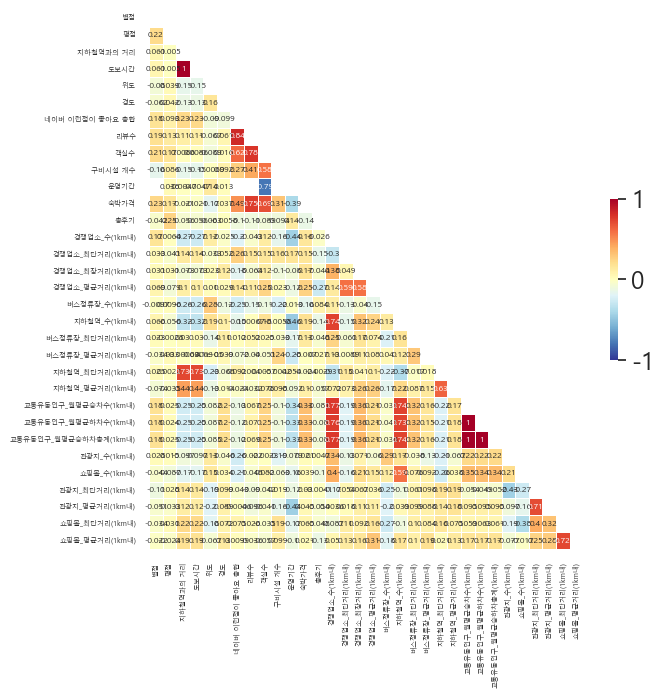

In [18]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(5)

sns.set(style='white', font_scale=1.6,
        #font="AppleGothic", 
        font='Malgun Gothic',
        rc={"axes.unicode_minus":False})

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(cor_matrix, bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(cor_matrix, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .3},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,   # 컬러바 범위 -1 ~ 1
            annot_kws={"size": 6}
           ).figure.savefig('../IMG/testout.pdf')

In [16]:
plt.savefig('../IMG/(ny)cor_martrix.pdf')

AttributeError: 'Axes' object has no attribute 'savefig'